<p style="color:#153462; 
          font-weight: bold; 
          font-size: 30px; 
          font-family: Gill Sans, sans-serif; 
          text-align: center;">
          RNN Implementation</p>

<p style="text-align: justify; text-justify: inter-word;">
   <font size=3>
       Using Recurrent Neural Network we are going to predict stock price of Google. For this entire experiment we are only
       going to use "Open" price of the stock
   </font>
</p>

### <span style="color:#3C4048; font-weight: bold; font-size: 18px; font-family: Gill Sans, sans-serif;">Importing Required Packages</span>

In [2]:
import pandas as pd
import numpy as np
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
import matplotlib.pyplot as plt

### <span style="color:#3C4048; font-weight: bold; font-size: 18px; font-family: Gill Sans, sans-serif;">Data Reading</span>

In [3]:
start_date = '2017-01-01'
end_date = '2023-10-30' # Not considered latest date as needs for training
df = yf.download('GOOG', start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [4]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,38.940498,39.481499,38.790001,39.306999,39.306999,33146000
2017-01-04,39.417999,39.567001,39.158001,39.345001,39.345001,21460000
2017-01-05,39.304001,39.723999,39.250999,39.701000,39.701000,26704000
2017-01-06,39.763000,40.395000,39.610199,40.307499,40.307499,32804000
2017-01-09,40.320000,40.498299,40.141499,40.332500,40.332500,25492000


In [5]:
training_set = df.iloc[:, 0:1].to_numpy() # Doing this way is important as it returns 2D array
training_set

array([[ 38.94049835],
       [ 39.41799927],
       [ 39.30400085],
       ...,
       [129.77000427],
       [124.47000122],
       [124.02999878]])

In [6]:
# Scaling the data. It will scale values between 0 to 1
sc = MinMaxScaler(feature_range=(0, 1))
scaled_data_obj = sc.fit(training_set)
training_set_scaled = scaled_data_obj.transform(training_set)
training_set_scaled

array([[0.        ],
       [0.00422855],
       [0.00321903],
       ...,
       [0.80434906],
       [0.75741439],
       [0.75351791]])

In [8]:
# Just verifying
#sc.inverse_transform(training_set_scaled)

### <span style="color:#3C4048; font-weight: bold; font-size: 18px; font-family: Gill Sans, sans-serif;">Creating Dataset</span>

Creating a data structure with 60 timestamp steps and with 1 ouput

In [9]:
# Demonstrating with simple code how it looks like
X_demo = []
y_demo = []
nums = list(range(0, 8)) # 0 to 7 numbers
for i in range(2, len(nums)):
    X_demo.append(nums[i-2:i])
    y_demo.append(nums[i])

In [10]:
X_demo

[[0, 1], [1, 2], [2, 3], [3, 4], [4, 5], [5, 6]]

In [11]:
y_demo

[2, 3, 4, 5, 6, 7]

In [12]:
# Apply same strategy on the scaled dataset
X_train = []
y_train = []
for i in range(60, len(training_set_scaled)):
    # Taking 60 rows and selecting 0 so that it well get an array of 60 elements.
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i])

In [13]:
X_train = np.array(X_train)
y_train = np.array(y_train)

In [14]:
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")

Shape of X_train: (1657, 60)
Shape of y_train: (1657, 1)


In [30]:
X_train.shape

(1657, 60)

In [16]:
# Reshaping the trining array
X_train=np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(1657, 60, 1)

### <span style="color:#3C4048; font-weight: bold; font-size: 18px; font-family: Gill Sans, sans-serif;">Building the RNN</span>

In [25]:
# Initializing the RNN
regressor = Sequential()

Below is the description about the parameter of <b>LSTM</b>:
<p style="text-align: justify; text-justify: inter-word;">
   <font size=3>
       <b>units=50:</b><br>
       This parameter specifies the number of LSTM units (or neurons) in the layer. In this case, there are 50 LSTM units in the layer. 
       These units are responsible for capturing and learning patterns in the sequential data.
       <br><br>
       <b>return_sequences=True:</b><br>
       This parameter determines whether to return the full sequence of outputs for each timestep or just the last output. When return_sequences
       is set to True, the layer will output the full sequence, and when set to False (or omitted, as it defaults to False), only the last output
       for each input sequence will be returned.
       <br><br>
       <b>input_shape=(X_train.shape[1], 1):</b><br>
       This parameter specifies the shape of the input data that the LSTM layer will receive. In this case, the input shape is set to
       (X_train.shape[1], 1), where X_train.shape[1] represents the number of timesteps in each input sequence, and 1 represents the number
       of features at each timestep. The reshaping of the input data is done using np.reshape to match this input shape requirement.
   </font>
</p>


In [26]:
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))

<p style="text-align: justify; text-justify: inter-word;">
   <font size=3>
       The <b>Dropout</b> layer is a regularization technique used in neural networks to prevent overfitting. Overfitting occurs when a model 
       learns the training data too well, including its noise and specific patterns that may not generalize well to new, unseen data.Dropout helps
       address this issue by randomly "dropping out" (i.e., setting to zero) a fraction of the input units (neurons) during training. This prevents
       the network from relying too much on specific neurons and helps it generalize better to new data.
   </font>
</p>

In [27]:
regressor.add(Dropout(0.2))

In [28]:
# Adding two more layer with return_sequence is True
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

In [29]:
# Layer without return_sequence
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

In [30]:
# Adding the last layer
regressor.add(Dense(units=1))

In [31]:
# Compiling the RNN
regressor.compile(optimizer="adam",
                  loss="mean_squared_error" # Since the output that we are predicting is a continous value
                 )

In [32]:
# Fitting the RNN to the trainingset
regressor.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
52/52 [==============================] - 21s 149ms/step - loss: 0.0236
Epoch 2/100
52/52 [==============================] - 8s 149ms/step - loss: 0.0046
Epoch 3/100
52/52 [==============================] - 8s 146ms/step - loss: 0.0050
Epoch 4/100
52/52 [==============================] - 8s 146ms/step - loss: 0.0044
Epoch 5/100
52/52 [==============================] - 8s 146ms/step - loss: 0.0042
Epoch 6/100
52/52 [==============================] - 8s 145ms/step - loss: 0.0042
Epoch 7/100
52/52 [==============================] - 8s 146ms/step - loss: 0.0044
Epoch 8/100
52/52 [==============================] - 8s 147ms/step - loss: 0.0038
Epoch 9/100
52/52 [==============================] - 8s 147ms/step - loss: 0.0036
Epoch 10/100
52/52 [==============================] - 7s 144ms/step - loss: 0.0036
Epoch 11/100
52/52 [==============================] - 6s 121ms/step - loss: 0.0036
Epoch 12/100
52/52 [==============================] - 8s 150ms/step - loss: 0.0033
Epoch 13/100

In [33]:
# Getting the stock price data for Nov 2023 on which we are going perform validation
test_start_date = "2023-10-31"
test_end_date = "2023-11-30"
dataset_test = yf.download('GOOG', start=test_start_date, end=test_end_date)

[*********************100%%**********************]  1 of 1 completed


In [34]:
dataset_test.shape

(21, 6)

In [35]:
real_stock_price = dataset_test.iloc[:, 0:1].to_numpy() # Doing this way is important as it returns 2D array
real_stock_price

array([[126.26999664],
       [125.33999634],
       [129.55999756],
       [129.08999634],
       [130.22000122],
       [131.97999573],
       [132.36000061],
       [133.36000061],
       [131.52999878],
       [133.36000061],
       [135.6499939 ],
       [136.63999939],
       [136.96000671],
       [137.82000732],
       [135.5       ],
       [137.94000244],
       [139.1000061 ],
       [139.53999329],
       [137.57000732],
       [137.63000488],
       [138.98500061]])

In [36]:
# Since we are considering last 60 days to predict current day data. our test dataset has dependency on training data
# For example 2023-10-31 date has dependency on previous 60 days
dataset_total = pd.concat((df["Open"], dataset_test["Open"]), axis=0)

In [37]:
# Preparing input data for test dataset, it seems considering all the dependency values from the training set
inputs = dataset_total[len(dataset_total)-len(dataset_test)-60:].values

In [38]:
inputs = inputs.reshape(-1, 1)
inputs = scaled_data_obj.transform(inputs)

In [39]:
# Apply same strategy on the scaled dataset
X_test = []
for i in range(60, len(inputs)):
    # Taking 60 rows and selecting 0 so that it  well get an array of 60 elements.
    X_test.append(inputs[i-60:i, 0])

In [40]:
X_test = np.array(X_test)
X_test=np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_test.shape

(21, 60, 1)

In [41]:
pred_stock_price = regressor.predict(X_test)

1/1 [==============================] - 3s 3s/step


In [43]:
trans_pred_stock_price = scaled_data_obj.inverse_transform(pred_stock_price)
trans_pred_stock_price

array([[125.90678],
       [125.56707],
       [125.52966],
       [127.04863],
       [127.81814],
       [128.3381 ],
       [129.25015],
       [129.98732],
       [130.82503],
       [130.61627],
       [131.20724],
       [132.76086],
       [134.19124],
       [135.01881],
       [135.70612],
       [135.0767 ],
       [135.6217 ],
       [136.62375],
       [137.35089],
       [136.78899],
       [136.32558]], dtype=float32)

#### Visualizing Results

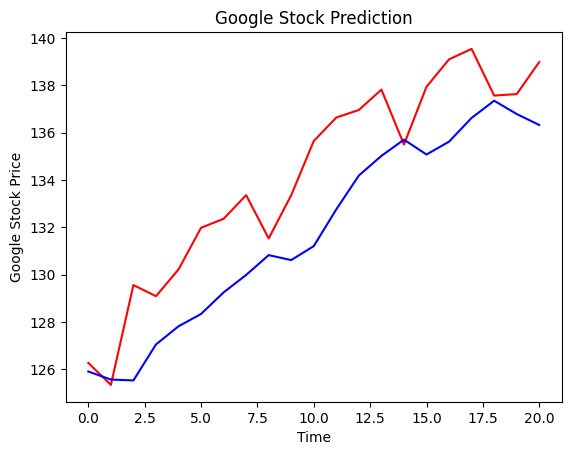

In [45]:
plt.plot(real_stock_price, color="red", label="Real Google Stock Price")
plt.plot(trans_pred_stock_price, color="blue", label="Predicted Google Stock Price")
plt.title("Google Stock Prediction")
plt.xlabel("Time")
plt.ylabel("Google Stock Price")
plt.show()

In [46]:
(real_stock_price, trans_pred_stock_price)

(array([[126.26999664],
        [125.33999634],
        [129.55999756],
        [129.08999634],
        [130.22000122],
        [131.97999573],
        [132.36000061],
        [133.36000061],
        [131.52999878],
        [133.36000061],
        [135.6499939 ],
        [136.63999939],
        [136.96000671],
        [137.82000732],
        [135.5       ],
        [137.94000244],
        [139.1000061 ],
        [139.53999329],
        [137.57000732],
        [137.63000488],
        [138.98500061]]),
 array([[125.90678],
        [125.56707],
        [125.52966],
        [127.04863],
        [127.81814],
        [128.3381 ],
        [129.25015],
        [129.98732],
        [130.82503],
        [130.61627],
        [131.20724],
        [132.76086],
        [134.19124],
        [135.01881],
        [135.70612],
        [135.0767 ],
        [135.6217 ],
        [136.62375],
        [137.35089],
        [136.78899],
        [136.32558]], dtype=float32))